In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Charger les données de la blockchain
external = pd.read_csv('./timeseries/external.csv')
blockchain_global = pd.read_csv('./timeseries/global.csv')
blockchain_by_actor = pd.read_csv('./timeseries/blockchain_by_actor.csv')

blockchain_global['date'] = pd.to_datetime(blockchain_global['year'].astype(str) + '-' + blockchain_global['month'].astype(str) + '-' + blockchain_global['day'].astype(str))
blockchain_global

,Unnamed: 0,year,month,day,total_fee,total_received_satoshi,total_sent_satoshi,mean_fee_satoshi,mean_feeUSD,mean_fee_for100,...,nb_payments,mean_nb_inputs,mean_nb_outputs,nb_mining,total_mining_satoshi,newly_created_coins,self_spent_satoshi,total_received,volume_without_self,date
0,2015-01-01,2015,1,1,801373971,45473028339385,45058028339385,13609.829337,4.284054e+06,0.799999,...,161194,2.595241,2.737577,166,415801373971,415000000000,2757774885900,45473028339385,42715253453485,2015-01-01
1,2015-01-02,2015,1,2,1159934218,73370568521080,72955568521080,14978.682808,4.732406e+06,0.778933,...,257633,2.715557,3.326915,166,416159934218,415000000000,4316724676318,73370568521080,69053843844762,2015-01-02
2,2015-01-03,2015,1,3,1196476043,82635189454578,82220189454578,14304.385766,4.086009e+06,0.797419,...,295618,2.781885,3.534240,166,416196476043,415000000000,5584584356557,82635189454578,77050605098021,2015-01-03
3,2015-01-04,2015,1,4,2159195328,115159442449532,114726942449532,25138.199015,6.619757e+06,0.899054,...,280288,2.770133,3.263223,173,434659195328,432500000000,6554587956125,115159442449532,108604854493407,2015-01-04
4,2015-01-05,2015,1,5,1608443040,112439228285641,112051728285641,16955.609622,4.662858e+06,0.898594,...,286552,2.954471,3.020725,155,389108443040,387500000000,5063695492444,112439228285641,107375532793197,2015-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,2017-06-26,2017,6,26,35993152232,375012739382430,374842739382430,145080.443192,3.520181e+08,2.771988,...,626222,2.565329,2.524163,136,205993152232,170000000000,14151200557043,375012739382430,360861538825387,2017-06-26
908,2017-06-27,2017,6,27,38384859820,287624055555912,287452805555912,142346.452989,3.601857e+08,3.044288,...,747924,2.314862,2.773602,137,209634859820,171250000000,19821969138631,287624055555912,267802086417281,2017-06-27
909,2017-06-28,2017,6,28,38663204682,282904720130478,282717220130478,140744.451983,3.606988e+08,2.884102,...,686018,2.471178,2.497290,150,226163204682,187500000000,10958737629631,282904720130478,271945982500847,2017-06-28
910,2017-06-29,2017,6,29,33153365173,317698686929569,317543686929569,144453.442667,3.669758e+08,2.760877,...,570680,2.451838,2.486526,124,188153365173,155000000000,16909883109542,317698686929569,300788803820027,2017-06-29


In [9]:
# import matplotlib as plt

sub_df = df[['Unnamed: 0', 'year', 'month', 'day', 'nb_transactions', 'nb_payments']]
sub_df = sub_df.loc[(sub_df['year'] == 2015) & (sub_df['month'].isin(range(6, 9)))]
sub_df

,Unnamed: 0,year,month,day,nb_transactions,nb_payments
151,2015-06-01,2015,6,1,128276,368571
152,2015-06-02,2015,6,2,128155,359902
153,2015-06-03,2015,6,3,126481,356699
154,2015-06-04,2015,6,4,121081,322003
155,2015-06-05,2015,6,5,109507,328414
...,...,...,...,...,...,...
238,2015-08-27,2015,8,27,117024,326234
239,2015-08-28,2015,8,28,121822,350146
240,2015-08-29,2015,8,29,110907,352666
241,2015-08-30,2015,8,30,94995,339302


<AxesSubplot:xlabel='Unnamed: 0'>

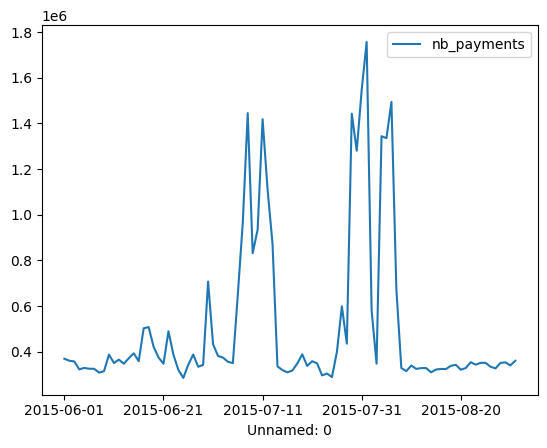

In [10]:
sub_df.plot(x='Unnamed: 0', y='nb_payments', kind='line')

<AxesSubplot:xlabel='Unnamed: 0'>

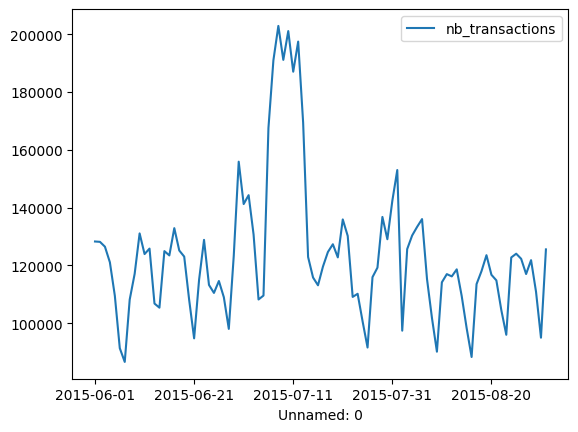

In [11]:
sub_df.plot(x='Unnamed: 0', y='nb_transactions', kind='line')

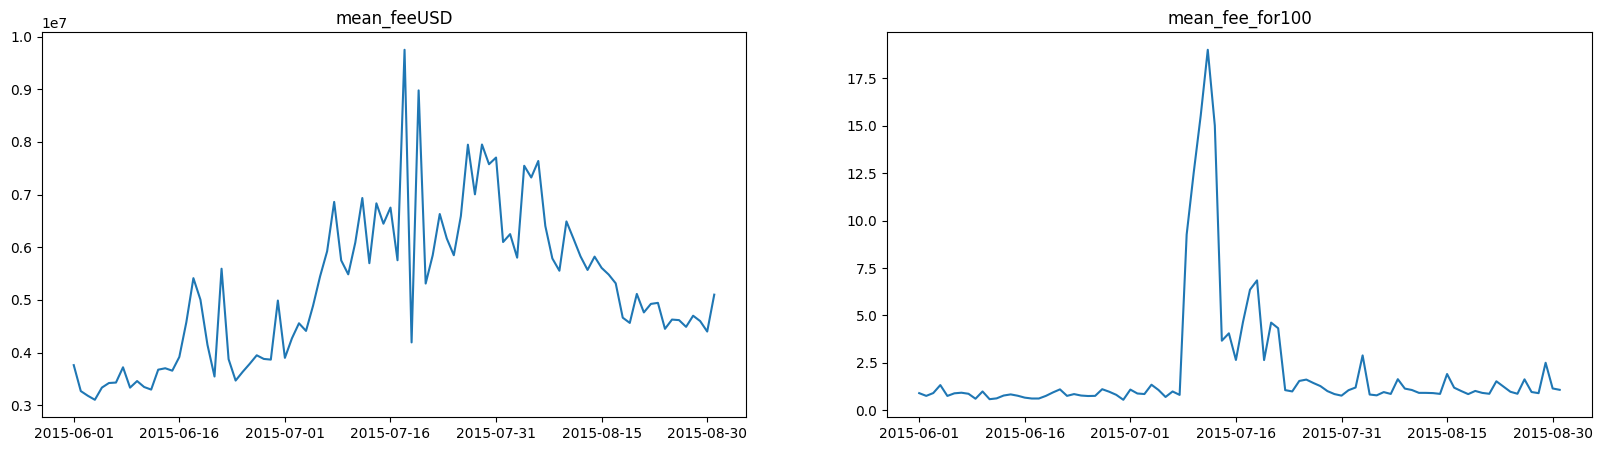

In [33]:
sub_mean = df[['Unnamed: 0', 'year', 'month', 'day', 'mean_feeUSD', 'mean_fee_for100']]
sub_mean = sub_mean.loc[(sub_mean['year'] == 2015) & (sub_mean['month'].isin(range(6, 9)))]

fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].plot(sub_mean['Unnamed: 0'], sub_mean['mean_feeUSD'])
ax[0].set_title('mean_feeUSD')
ax[0].xaxis.set_major_locator(plt.MaxNLocator(10))
ax[1].plot(sub_mean['Unnamed: 0'], sub_mean['mean_fee_for100'])
ax[1].set_title('mean_fee_for100')
ax[1].xaxis.set_major_locator(plt.MaxNLocator(10))